In [1]:
#submissions vs score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize 

BASE_DIR = 'C:/Users/llschers/OneDrive - Indiana University/Documents/GitHub/Envisioning-Kaggle/Filtered Competition Metadata'


In [3]:
submissions_df = pd.read_csv(BASE_DIR+'/Submissions.csv', infer_datetime_format=True)
submissions_df

,Unnamed: 0,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
0,7977327,18211765,2116404,5838905,47531414.0,11/23/2020,04/24/2021,False,0.0000,0.000000,0.0000,0.000000
1,7977328,18215715,2116404,5838905,47546410.0,11/23/2020,04/24/2021,False,0.0000,0.000000,0.0000,0.000000
2,7977329,18400127,2116404,5838905,48246825.0,12/01/2020,04/23/2021,False,0.0000,0.000000,0.0000,0.000000
3,7977330,18129418,2006644,5839405,47251592.0,11/19/2020,04/24/2021,False,0.0000,0.000000,0.0000,0.000000
4,7977331,18136688,2006644,5839405,47275557.0,11/20/2020,NaN,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
36117,9555635,23341089,6000395,5849333,77656793.0,10/21/2021,10/21/2021,True,0.8583,0.858353,0.0000,0.000000
36118,9555636,23341364,6000395,5849333,77658956.0,10/21/2021,10/21/2021,True,0.8556,0.855673,0.0000,0.000000
36119,9555637,23351670,6000395,5849333,77715536.0,10/22/2021,10/22/2021,True,0.9053,0.905327,0.0000,0.000000
36120,9555638,23348449,6000395,5849333,77694406.0,10/22/2021,10/22/2021,True,0.8728,0.872897,0.0000,0.000000


In [4]:
#were there any after the deadline?
print(submissions_df.IsAfterDeadline.unique())

[False  True]


In [5]:
#remove any submissions after deadline

submissions_df = submissions_df[submissions_df.IsAfterDeadline==False]
submissions_df

,Unnamed: 0,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
0,7977327,18211765,2116404,5838905,47531414.0,11/23/2020,04/24/2021,False,0.0000,0.00000,0.0000,0.000000
1,7977328,18215715,2116404,5838905,47546410.0,11/23/2020,04/24/2021,False,0.0000,0.00000,0.0000,0.000000
2,7977329,18400127,2116404,5838905,48246825.0,12/01/2020,04/23/2021,False,0.0000,0.00000,0.0000,0.000000
3,7977330,18129418,2006644,5839405,47251592.0,11/19/2020,04/24/2021,False,0.0000,0.00000,0.0000,0.000000
4,7977331,18136688,2006644,5839405,47275557.0,11/20/2020,NaN,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
36098,9153961,21006565,6273904,6720228,62504744.0,05/10/2021,05/10/2021,False,0.9063,0.90638,0.9354,0.935412
36099,9153962,21009140,6273904,6720228,62509954.0,05/10/2021,NaN,False,NaN,NaN,NaN,NaN
36100,9153963,21003640,6273904,6720228,62256170.0,05/10/2021,NaN,False,NaN,NaN,NaN,NaN
36101,9153964,21010275,6273904,6720228,62516823.0,05/10/2021,NaN,False,NaN,NaN,NaN,NaN


In [6]:
#transform data 

#need for each team #submissions and max private leaderboard score

grouped_submissions = submissions_df.groupby("TeamId")

grouped_submissions = pd.DataFrame(grouped_submissions.max("PrivateScoreLeaderboardDisplay"))

In [7]:
grouped_submissions.PrivateScoreLeaderboardDisplay

TeamId
5838851    0.9242
5838905    0.0000
5838923    0.8786
5838928    0.9450
5838987    0.9358
            ...  
6731149    0.0000
6731312    0.9354
6731341    0.9445
6732189    0.9347
6733178    0.9468
Name: PrivateScoreLeaderboardDisplay, Length: 1200, dtype: float64

In [8]:
grouped_teams = submissions_df
grouped_teams["NumSubmissions"] = 1
grouped_teams = grouped_teams.groupby("TeamId").sum()
grouped_teams

<ipython-input-8-56c079a5159a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_teams["NumSubmissions"] = 1


,Unnamed: 0,Id,SubmittedUserId,SourceKernelVersionId,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision,NumSubmissions
TeamId,,,,,,,,,,
5838851,26067828,61072702,10550388,1.766602e+08,0,1.7523,1.752447,1.8230,1.823122,3
5838905,23931984,54827607,6349212,1.433246e+08,0,0.0000,0.000000,0.0000,0.000000,3
5838923,171494978,391752691,81715011,1.042235e+09,0,1.6816,1.681723,1.7456,1.745698,21
5838928,17502415,41934296,771810,1.244300e+08,0,1.8439,1.844046,1.8784,1.878529,2
5838987,148036445,348710459,5097178,1.015521e+09,0,12.8670,12.867637,1.8682,1.868289,17
...,...,...,...,...,...,...,...,...,...,...
6731149,26508581,62744095,21780468,1.859684e+08,0,0.9148,0.914900,0.0000,0.000000,3
6731312,44713700,104938730,30125605,3.114139e+08,0,4.5909,4.591240,4.6730,4.673330,5
6731341,34958894,83510081,8626220,2.470478e+08,0,3.6741,3.674295,0.9445,0.944555,4


In [9]:
grouped_teams_df = pd.DataFrame(grouped_teams)
grouped_teams_df.NumSubmissions

TeamId
5838851     3
5838905     3
5838923    21
5838928     2
5838987    17
           ..
6731149     3
6731312     5
6731341     4
6732189     2
6733178     5
Name: NumSubmissions, Length: 1200, dtype: int64

In [10]:
df_to_plot = pd.DataFrame()
df_to_plot["NumSubmissions"] = grouped_teams_df.NumSubmissions
df_to_plot["HighScores"] = grouped_submissions.PrivateScoreLeaderboardDisplay
df_to_plot.to_csv("df_to_plot.csv", index=False)
df_to_plot_v2 = pd.read_csv('df_to_plot.csv')
df_to_plot_v2

,NumSubmissions,HighScores
0,3,0.9242
1,3,0.0000
2,21,0.8786
3,2,0.9450
4,17,0.9358
...,...,...
1195,3,0.0000
1196,5,0.9354
1197,4,0.9445
1198,2,0.9347


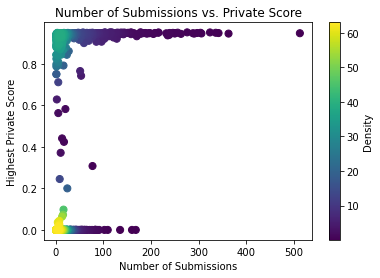

In [11]:


# identify data
x = df_to_plot_v2["NumSubmissions"]
y = df_to_plot_v2["HighScores"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
#plt.xlim([0, 180])
plt.xlabel('Number of Submissions')
#plt.ylim([0, 150])
plt.ylabel('Highest Private Score')
plt.title('Number of Submissions vs. Private Score')
norm = Normalize(vmin = np.min(z)*2000, vmax = np.max(z)*2000)
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Density')
plt.savefig('Number of Submissions vs Private Score.png')
plt.show()
